# Purpose
Predict total sales for every product and store in the next month

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

# Data import

In [2]:
sales_train = pd.read_feather('C:/Users/nowic/Desktop/Home tasks/Pets/Future Sales/EDA & feather data/sales_train.feather')
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.000000,1.0
1,03.01.2013,0,25,2552,899.000000,1.0
2,05.01.2013,0,25,2552,899.000000,-1.0
3,06.01.2013,0,25,2554,1709.050049,1.0
4,15.01.2013,0,25,2555,1099.000000,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.000000,1.0
2935845,09.10.2015,33,25,7460,299.000000,1.0
2935846,14.10.2015,33,25,7459,349.000000,1.0
2935847,22.10.2015,33,25,7440,299.000000,1.0


In [3]:
items = pd.read_feather('C:/Users/nowic/Desktop/Home tasks/Pets/Future Sales/EDA & feather data/items.feather')
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [4]:
item_categories = pd.read_feather('C:/Users/nowic/Desktop/Home tasks/Pets/Future Sales/EDA & feather data/item_categories.feather')
item_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [5]:
shops = pd.read_feather('C:/Users/nowic/Desktop/Home tasks/Pets/Future Sales/EDA & feather data/shops.feather')
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


# Joining  to one DataFrame

In [6]:
joined_items = items.join(item_categories.set_index('item_category_id'), on='item_category_id')
joined_items

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,Программы - Для дома и офиса (Цифра)
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
4,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD
...,...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31,Игры PC - Цифра
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54,Книги - Цифра
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49,Книги - Методические материалы 1С
22168,Яйцо для Little Inu,22168,62,"Подарки - Гаджеты, роботы, спорт"


In [7]:
joined_sales = sales_train.join(joined_items.set_index('item_id'), on='item_id')
joined_sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.000000,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.000000,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,05.01.2013,0,25,2552,899.000000,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,06.01.2013,0,25,2554,1709.050049,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,15.01.2013,0,25,2555,1099.000000,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства
...,...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.000000,1.0,V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства
2935845,09.10.2015,33,25,7460,299.000000,1.0,V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства
2935846,14.10.2015,33,25,7459,349.000000,1.0,V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства
2935847,22.10.2015,33,25,7440,299.000000,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3


## Final frame to investigate

In [8]:
# date - date in format dd/mm/yyyy
# date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
# item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
# item_name - name of item
# item_category_name - name of item category
# shop_name - name of shop

sales_train_final = joined_sales.join(shops.set_index('shop_id'), on='shop_id')
sales_train_final = sales_train_final.drop(['shop_id', 'item_id', 'item_category_id'], axis=1)
sales_train_final

,date,date_block_num,item_price,item_cnt_day,item_name,item_category_name,shop_name
0,02.01.2013,0,999.000000,1.0,ЯВЛЕНИЕ 2012 (BD),Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,899.000000,1.0,DEEP PURPLE The House Of Blue Light LP,Музыка - Винил,"Москва ТРК ""Атриум"""
2,05.01.2013,0,899.000000,-1.0,DEEP PURPLE The House Of Blue Light LP,Музыка - Винил,"Москва ТРК ""Атриум"""
3,06.01.2013,0,1709.050049,1.0,DEEP PURPLE Who Do You Think We Are LP,Музыка - Винил,"Москва ТРК ""Атриум"""
4,15.01.2013,0,1099.000000,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
...,...,...,...,...,...,...,...
2935844,10.10.2015,33,299.000000,1.0,V/A Nu Jazz Selection (digipack),Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935845,09.10.2015,33,299.000000,1.0,V/A The Golden Jazz Collection 1 2CD,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935846,14.10.2015,33,349.000000,1.0,V/A The Best Of The 3 Tenors,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935847,22.10.2015,33,299.000000,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),Музыка - MP3,"Москва ТРК ""Атриум"""


# EDA

## Describe

In [9]:
sales_train_final.describe()

,date_block_num,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,8.906234e+02,1.242641e+00
std,9.422988e+00,1.726440e+03,2.612213e+00
min,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.990000e+02,1.000000e+00
75%,2.300000e+01,9.990000e+02,1.000000e+00
max,3.300000e+01,3.079800e+05,2.169000e+03


## Shops

### Item counts per shop

In [44]:
items_count_per_shop = sales_train_final.groupby(['shop_name'], as_index=False) \
    .agg({'item_name': 'count'}) \
    .rename(columns={'item_name': 'items_count'})
items_count_per_shop

,shop_name,items_count
0,"!Якутск Орджоникидзе, 56 фран",9857
1,"!Якутск ТЦ ""Центральный"" фран",5678
2,"Адыгея ТЦ ""Мега""",25991
3,"Балашиха ТРК ""Октябрь-Киномир""",25532
4,"Волжский ТЦ ""Волга Молл""",38242
5,"Вологда ТРЦ ""Мармелад""",38179
6,"Воронеж (Плехановская, 13)",82663
7,"Воронеж ТРЦ ""Максимир""",58076
8,"Воронеж ТРЦ Сити-Парк ""Град""",3412
9,Выездная Торговля,3751


In [45]:
sales_train_final['shop_name'].replace(
    to_replace=['Жуковский ул. Чкалова 39м?', 'Жуковский ул. Чкалова 39м²'],
    value = 'Жуковский ул. Чкалова',
    inplace=True
)

items_count_per_shop = sales_train_final.groupby(['shop_name'], as_index=False) \
    .agg({'item_name': 'count'}) \
    .rename(columns={'item_name': 'items_count'})
items_count_per_shop

,shop_name,items_count
0,"!Якутск Орджоникидзе, 56 фран",9857
1,"!Якутск ТЦ ""Центральный"" фран",5678
2,"Адыгея ТЦ ""Мега""",25991
3,"Балашиха ТРК ""Октябрь-Киномир""",25532
4,"Волжский ТЦ ""Волга Молл""",38242
5,"Вологда ТРЦ ""Мармелад""",38179
6,"Воронеж (Плехановская, 13)",82663
7,"Воронеж ТРЦ ""Максимир""",58076
8,"Воронеж ТРЦ Сити-Парк ""Град""",3412
9,Выездная Торговля,3751


### Barplots
Items count per shop

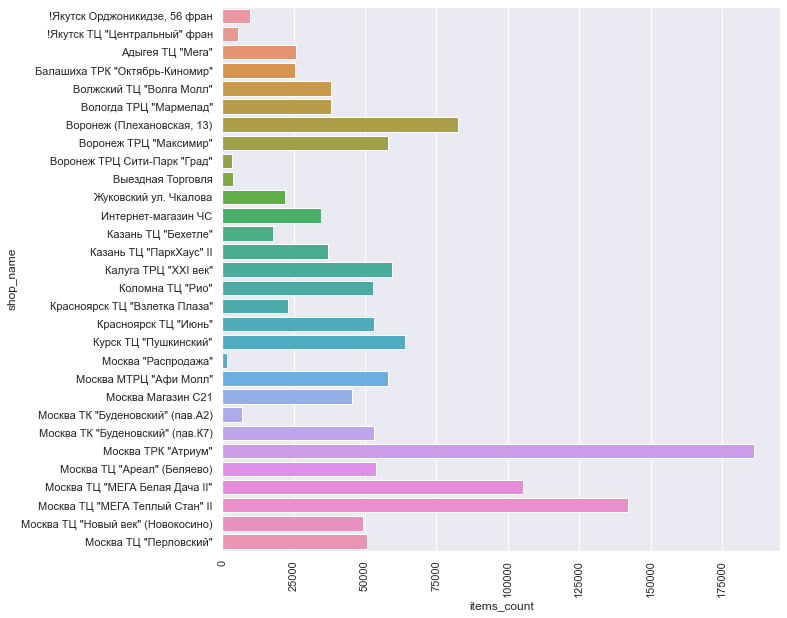

In [46]:
icps_barplot_half1 = sns.barplot(x='items_count', y='shop_name', data=items_count_per_shop[:30])
sns.set(rc={'figure.figsize': (10, 10)})
icps_barplot_half1.xaxis.set_tick_params(rotation=90)

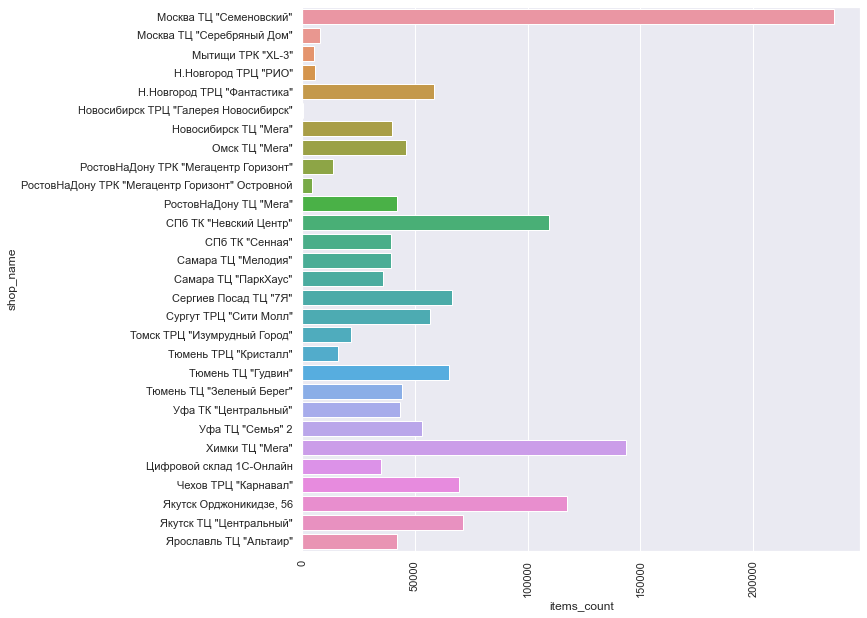

In [47]:
icps_barplot_half2 = sns.barplot(x='items_count', y='shop_name', data=items_count_per_shop[30:])
sns.set(rc={'figure.figsize': (10, 10)})
icps_barplot_half2.xaxis.set_tick_params(rotation=90)

## Categories

### Uniques

In [50]:
sales_train_final['item_category_name'].unique()

array(['Кино - Blu-Ray', 'Музыка - Винил',
       'Музыка - CD фирменного производства',
       'Музыка - Музыкальное видео',
       'Музыка - CD локального производства', 'Игры - XBOX 360',
       'Игры - PS3', 'Игры PC - Дополнительные издания',
       'Игры PC - Стандартные издания', 'Игры - PSP', 'Кино - DVD',
       'Программы - Для дома и офиса',
       'Книги - Методические материалы 1С',
       'Игры PC - Коллекционные издания', 'Игры - PSVita',
       'Подарки - Развитие', 'Программы - 1С:Предприятие 8',
       'Программы - Обучающие', 'Музыка - MP3',
       'Музыка - Подарочные издания', 'Аксессуары - PSP',
       'Подарки - Гаджеты, роботы, спорт', 'Книги - Аудиокниги',
       'Игровые консоли - XBOX 360', 'Аксессуары - PS3',
       'Аксессуары - PS4', 'Аксессуары - PSVita',
       'Подарки - Сертификаты, услуги', 'Карты оплаты - PSN',
       'Карты оплаты - Live!', 'Аксессуары - XBOX 360',
       'Кино - Blu-Ray 3D', 'Игры - Аксессуары для игр',
       'Игровые консоли - PS

In [54]:
sales_count_category_date = sales_train_final.groupby(['item_category_name', 'date_block_num'], as_index=False)\
    .agg({'item_cnt_day': 'count'})\
    .rename(columns={'item_cnt_day': 'item_cnt_date_block'})
sales_count_category_date

,item_category_name,date_block_num,item_cnt_date_block
0,PC - Гарнитуры/Наушники,0,1
1,PC - Гарнитуры/Наушники,1,1
2,PC - Гарнитуры/Наушники,3,1
3,Аксессуары - PS2,0,1
4,Аксессуары - PS2,1,1
...,...,...,...
2072,Элементы питания,29,184
2073,Элементы питания,30,204
2074,Элементы питания,31,196
2075,Элементы питания,32,198


In [56]:
sales_count_date = sales_train_final.groupby('date_block_num', as_index=False)\
    .agg({'item_cnt_day': 'count'})\
    .rename(columns={'item_cnt_day': 'item_cnt_block'})
sales_count_date

,date_block_num,item_cnt_block
0,0,115690
1,1,108613
2,2,121347
3,3,94109
4,4,91759
5,5,100403
6,6,100548
7,7,104772
8,8,96137
9,9,94202


<AxesSubplot:xlabel='date_block_num', ylabel='item_cnt_block'>

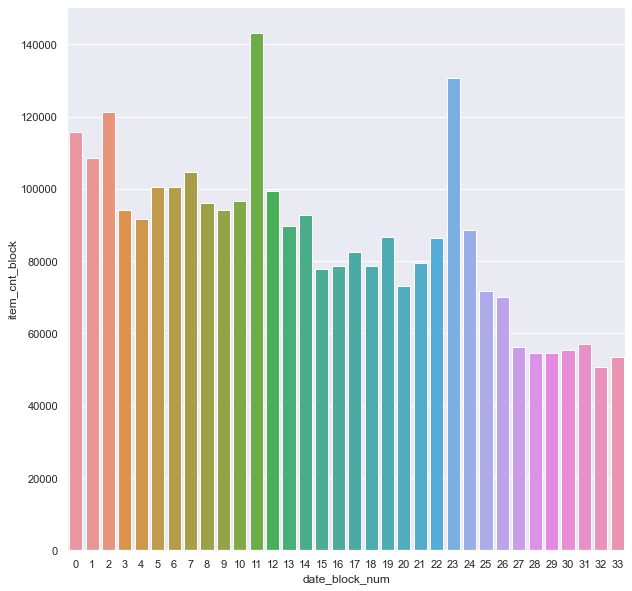

In [57]:
scd_barplot = sns.barplot(x='date_block_num', y='item_cnt_block', data=sales_count_date)
scd_barplot